<a href="https://colab.research.google.com/github/TheSeems/HseNotebooks/blob/main/Akhundov_calculus_16_2021_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import sympy
from sympy import S, solve, Matrix, diff, plot, simplify, factor
from sympy import log as Log
from sympy import sin as Sin
from sympy import cos as Cos
from sympy.plotting import plot3d
from sympy.geometry import Point
%matplotlib inline

In [25]:
from sympy.abc import x, y, z
from collections.abc import Iterable

def gradient(func, *var):
  return Matrix([func(*var).diff(variable) for variable in var])

def gradient_point(func, vars):
  return gradient(func, *vars.keys()).subs(vars)

def display_props(props):
  for title, value in props.items():
    print(title)

    if isinstance(value, Iterable):
      display(*value)
    else:
      display(value)

    print()

def tangent_and_normal(surface, point):
  M = point
  dictM = {x: M.x, y: M.y, z: M.z}
  f = surface

  fdx, fdy = [f.diff(p).subs(dictM) for p in [x, y]]

  planeM = sympy.Eq(
    z - M.z, fdx*(x - M.x) + fdy*(y - M.y)
  )

  norm_line = sympy.Eq(
    sympy.Eq ((x - M.x)/fdx, (y - M.y)/fdy, evaluate=False),
    (z - M.z)/(-1),
    evaluate=False
  )

  return (planeM, norm_line)

def tangent_and_normal_implicit(surface, point):
  M = point
  dictM = {x: M.x, y: M.y, z: M.z}
  F = surface

  Fdx, Fdy, Fdz = [F.diff(p).subs(dictM) for p in [x, y, z]]
  planeM = sympy.Eq(Fdx*(x - M.x) + Fdy*(y - M.y) + Fdz*(z - M.z), 0)

  norm_line = sympy.Eq(
      sympy.Eq((x - M.x)/Fdx,(y - M.y)/Fdy, evaluate=False),
      (z - M.z)/Fdz,
      evaluate=False
   )

  return (planeM, norm_line)

## Занятие 16
## Математический анализ
## Градиент функции нескольких переменных, производная по направлению, касательная плоскость.

    
### Задание 1
Найти градиент функции $z=x^2-xy-2y^2$ в произвольной точке и в точке М(1,2). Вычислить производную  в направлении, составляющем с положительным направлением оси ОХ угол 60 градусов, в точке М(1,2). 

In [26]:
def func(x, y):
  return x**2 - x*y - 2*y**2

alpha = sympy.pi / 3
M = (1, 2)
vect = (sympy.cos(alpha), sympy.sin(alpha))

# Arbitrary point
grad_arb = gradient_point(func, {x: x, y: y})
grad_M = gradient_point(func, {x: M[0], y: M[1]})
grad_dot = grad_M.dot(Matrix(vect))

display_props({
    'Градиент в произвольной точке': grad_arb,
    'Градиент в точке M': grad_M,
    'Производня в данном направлении': grad_dot
})

Градиент в произвольной точке


Matrix([
[ 2*x - y],
[-x - 4*y]])


Градиент в точке M


Matrix([
[ 0],
[-9]])


Производня в данном направлении


-9*sqrt(3)/2

###  Задание 2.
Поверхность задана уравнением $z = \frac{x^2}{2} - y^2$. Составить уравнение касательной плоскости и нормали в точке $М(2, -1, 1)$. Изобразить на графике.

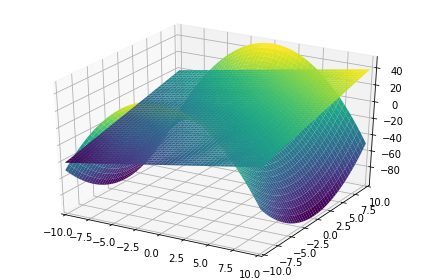

Eq(z - 1, 2*x + 2*y - 2)

Eq(Eq(x/2 - 1, y/2 + 1/2), 1 - z)

In [27]:
surface = x**2/2 - y**2
tangent, normal = tangent_and_normal(surface, Point(2, -1, 1))

plot3d(solve(tangent, z)[0], surface)
display(tangent, normal)

###  Задание 3.
Поверхность задана уравнением $3xyz - z^3 = a^3$. Составить уравнение касательной плоскости и нормали к поверхности в точке $x = 0$, $y = a$. 

In [28]:
a = sympy.symbols('a')
surface = 3*x*y*z - z**3 - a**3
tangent, normal = tangent_and_normal_implicit(surface, Point(0, a, -a))

display(tangent, normal)

Eq(-3*a**2*x - 3*a**2*(a + z), 0)

Eq(Eq(-x/(3*a**2), zoo*(-a + y)), -(a + z)/(3*a**2))

### Индивидуальное задание.
Поверхность задана уравнением $x^2+y^2+z^2=2Rz$. Составить уравнение касательной плоскости и нормали в точке $(R\cos\alpha,R\sin\alpha,R)$.  Изобразить на графике при $R=1$, $\alpha=\pi/6$.

#### Вариант 4.
$x^2 + 6x + y^2 + z^2 = 0, \ \ \ \ \, R = -3, \ \ \ \ \, \alpha = 1.78\pi$

Eq(-6*z + (6 - 6*cos(11*pi/50))*(x + 3*cos(11*pi/50)) + 6*(y - 3*sin(11*pi/50))*sin(11*pi/50) - 18, 0)

Eq(Eq((x + 3*cos(11*pi/50))/(6 - 6*cos(11*pi/50)), (y - 3*sin(11*pi/50))/(6*sin(11*pi/50))), -z/6 - 1/2)

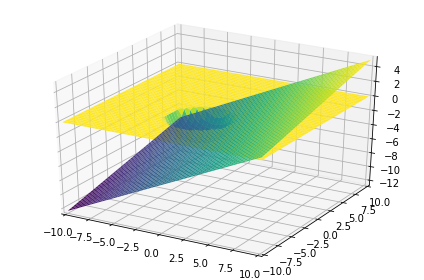

In [37]:
a = sympy.symbols('a')

surface = x**2 + 6*x + y**2 + z**2
R = -3
alpha = 1.78 * sympy.pi

M = Point(R * sympy.cos(alpha), R * sympy.sin(alpha), R)

tangent, normal = tangent_and_normal_implicit(surface, M)
display(tangent, normal)

plot3d(solve(tangent, z)[0], solve(surface, z)[0])